In [16]:
import tensorflow as tf

# Veri kümesini yükleme
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Eğitim ve doğrulama setlerini ayırma
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Verileri normalleştirme
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

# Sınıf isimlerini tanımlama
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

# İlk eğitim örneğinin sınıf ismini alma
print(class_names[y_train[0]])

# Model kurma aşaması
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
# Batch modeli
model.add(tf.keras.layers.Flatten())
# Girdi bağlantıları için Dense
model.add(tf.keras.layers.Dense(300, activation="relu")) #300 nöron sayısı, Aktivasyon fonksiyonu, sıfırdan küçük değerleri sıfıra, büyük değerleri kendisine götürür.
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) # Çıktı katmanı, model tahmini

# Modeli sequential katmanına bir örnek olarak kullanıyoruz
model = tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=[28, 28]), # Girdi katmanı
    model.add(tf.keras.layers.Dense(300, activation="relu")), # 1. Gizli katman
    model.add(tf.keras.layers.Dense(100, activation="relu")), # 2. Gizli katman
    model.add(tf.keras.layers.Dense(10, activation="softmax")) # Çıktı katmanı
    ]
    )

Ankle boot


TypeError: The added layer must be an instance of class Layer. Received: layer=None of type <class 'NoneType'>.

In [18]:
# Modelin özeti
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
 dense_19 (Dense)            (None, 300)               3300      
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 10)               

In [19]:
model.layers # Model katmanlarını bu metod ile görebiliriz

In [22]:
hidden1= model.layers[1] # Girdi katmanının ağırlıkları için, değişkene atadık
weights, biases = hidden1.get_weights()
weights # Ağırlıkları verir.
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
# Modeli compile edelim
model.compile(
    loss = "sparse_categorical_crossentropy", # İkili sınıflandırmala için, aktivasyon fonksiyonu olarak softmax yerine "sigmoid", loss fonksiyonu için "binary_crossentropy" kullanacaktık.
    optimizer = "sgd",
    metrics = ["accuracy"]
    )

In [25]:
# Model eğitme
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid)) # Epoch, verilerin modelden kaç defa geçeceğini gösterir.

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 2.0723 - accuracy: 0.2575 - val_loss: 1.6580 - val_accuracy: 0.3102
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 1.4748 - accuracy: 0.4215 - val_loss: 1.3243 - val_accuracy: 0.4772
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.1587 - accuracy: 0.5457 - val_loss: 0.9507 - val_accuracy: 0.6128
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8682 - accuracy: 0.6575 - val_loss: 0.7868 - val_accuracy: 0.7174
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7215 - accuracy: 0.7405 - val_loss: 0.6633 - val_accuracy: 0.7784
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5855 - accuracy: 0.8115 - val_loss: 0.5799 - val_accuracy: 0.8124
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4947 - accuracy: 0.8380 - val_loss: 0.5053 - val_accura

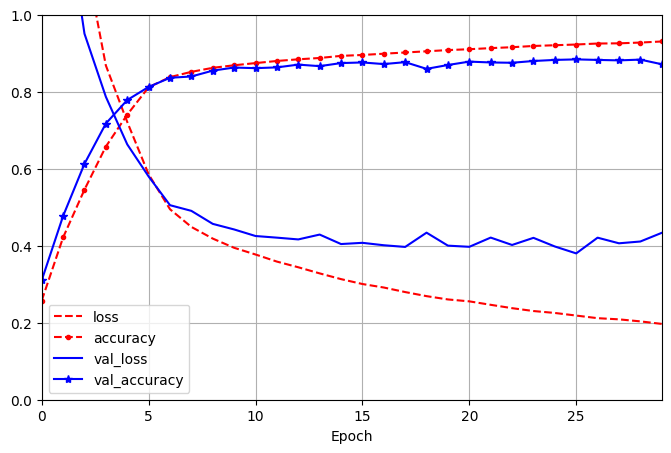

In [26]:
# Metriklerin grafiğini çizdirelim
import matplotlib.pyplot as plt
import pandas as pd
# Değerleri dataframe yapısına çevirelim
pd.DataFrame(history.history).plot(figsize=(8,5),
                                   xlim=[0,29],
                                   ylim=[0,1],
                                   grid= True,
                                   xlabel= "Epoch",
                                   style = ["r--","r--.","b-","b-*"])
plt.show()

In [27]:
# Modelin performansını görmek için test veriseti kullanalım.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8679


[0.4400968849658966, 0.867900013923645]

In [28]:
# Yeni verileri tahmin için predict metodunu kullanalım.
X_new = X_test[:3]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 179ms/step


In [29]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
# En yüksek olasılıkları görelim
import numpy as np
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')